# CMPT459 final project EDA

In [12]:
# import library and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# load dataset
data = pd.read_csv('data.csv', delimiter=';')

# preprocess

# check if there is missing value
data.isnull().sum()

# encoding categorical variable
# Dropout -> 0, Enrolled -> 1, Graduate -> 1
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# change column name Nacionality to Nationality
X.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# change Nationality value 1 to 1, all other to 0
X['Nationality'] = X['Nationality'].apply(lambda x: 1 if x == 1 else 0)

# drop Gender column to avoid discrimination
X = X.drop(['Gender'], axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# how many unique values for each column
print(data.nunique())

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
   

c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


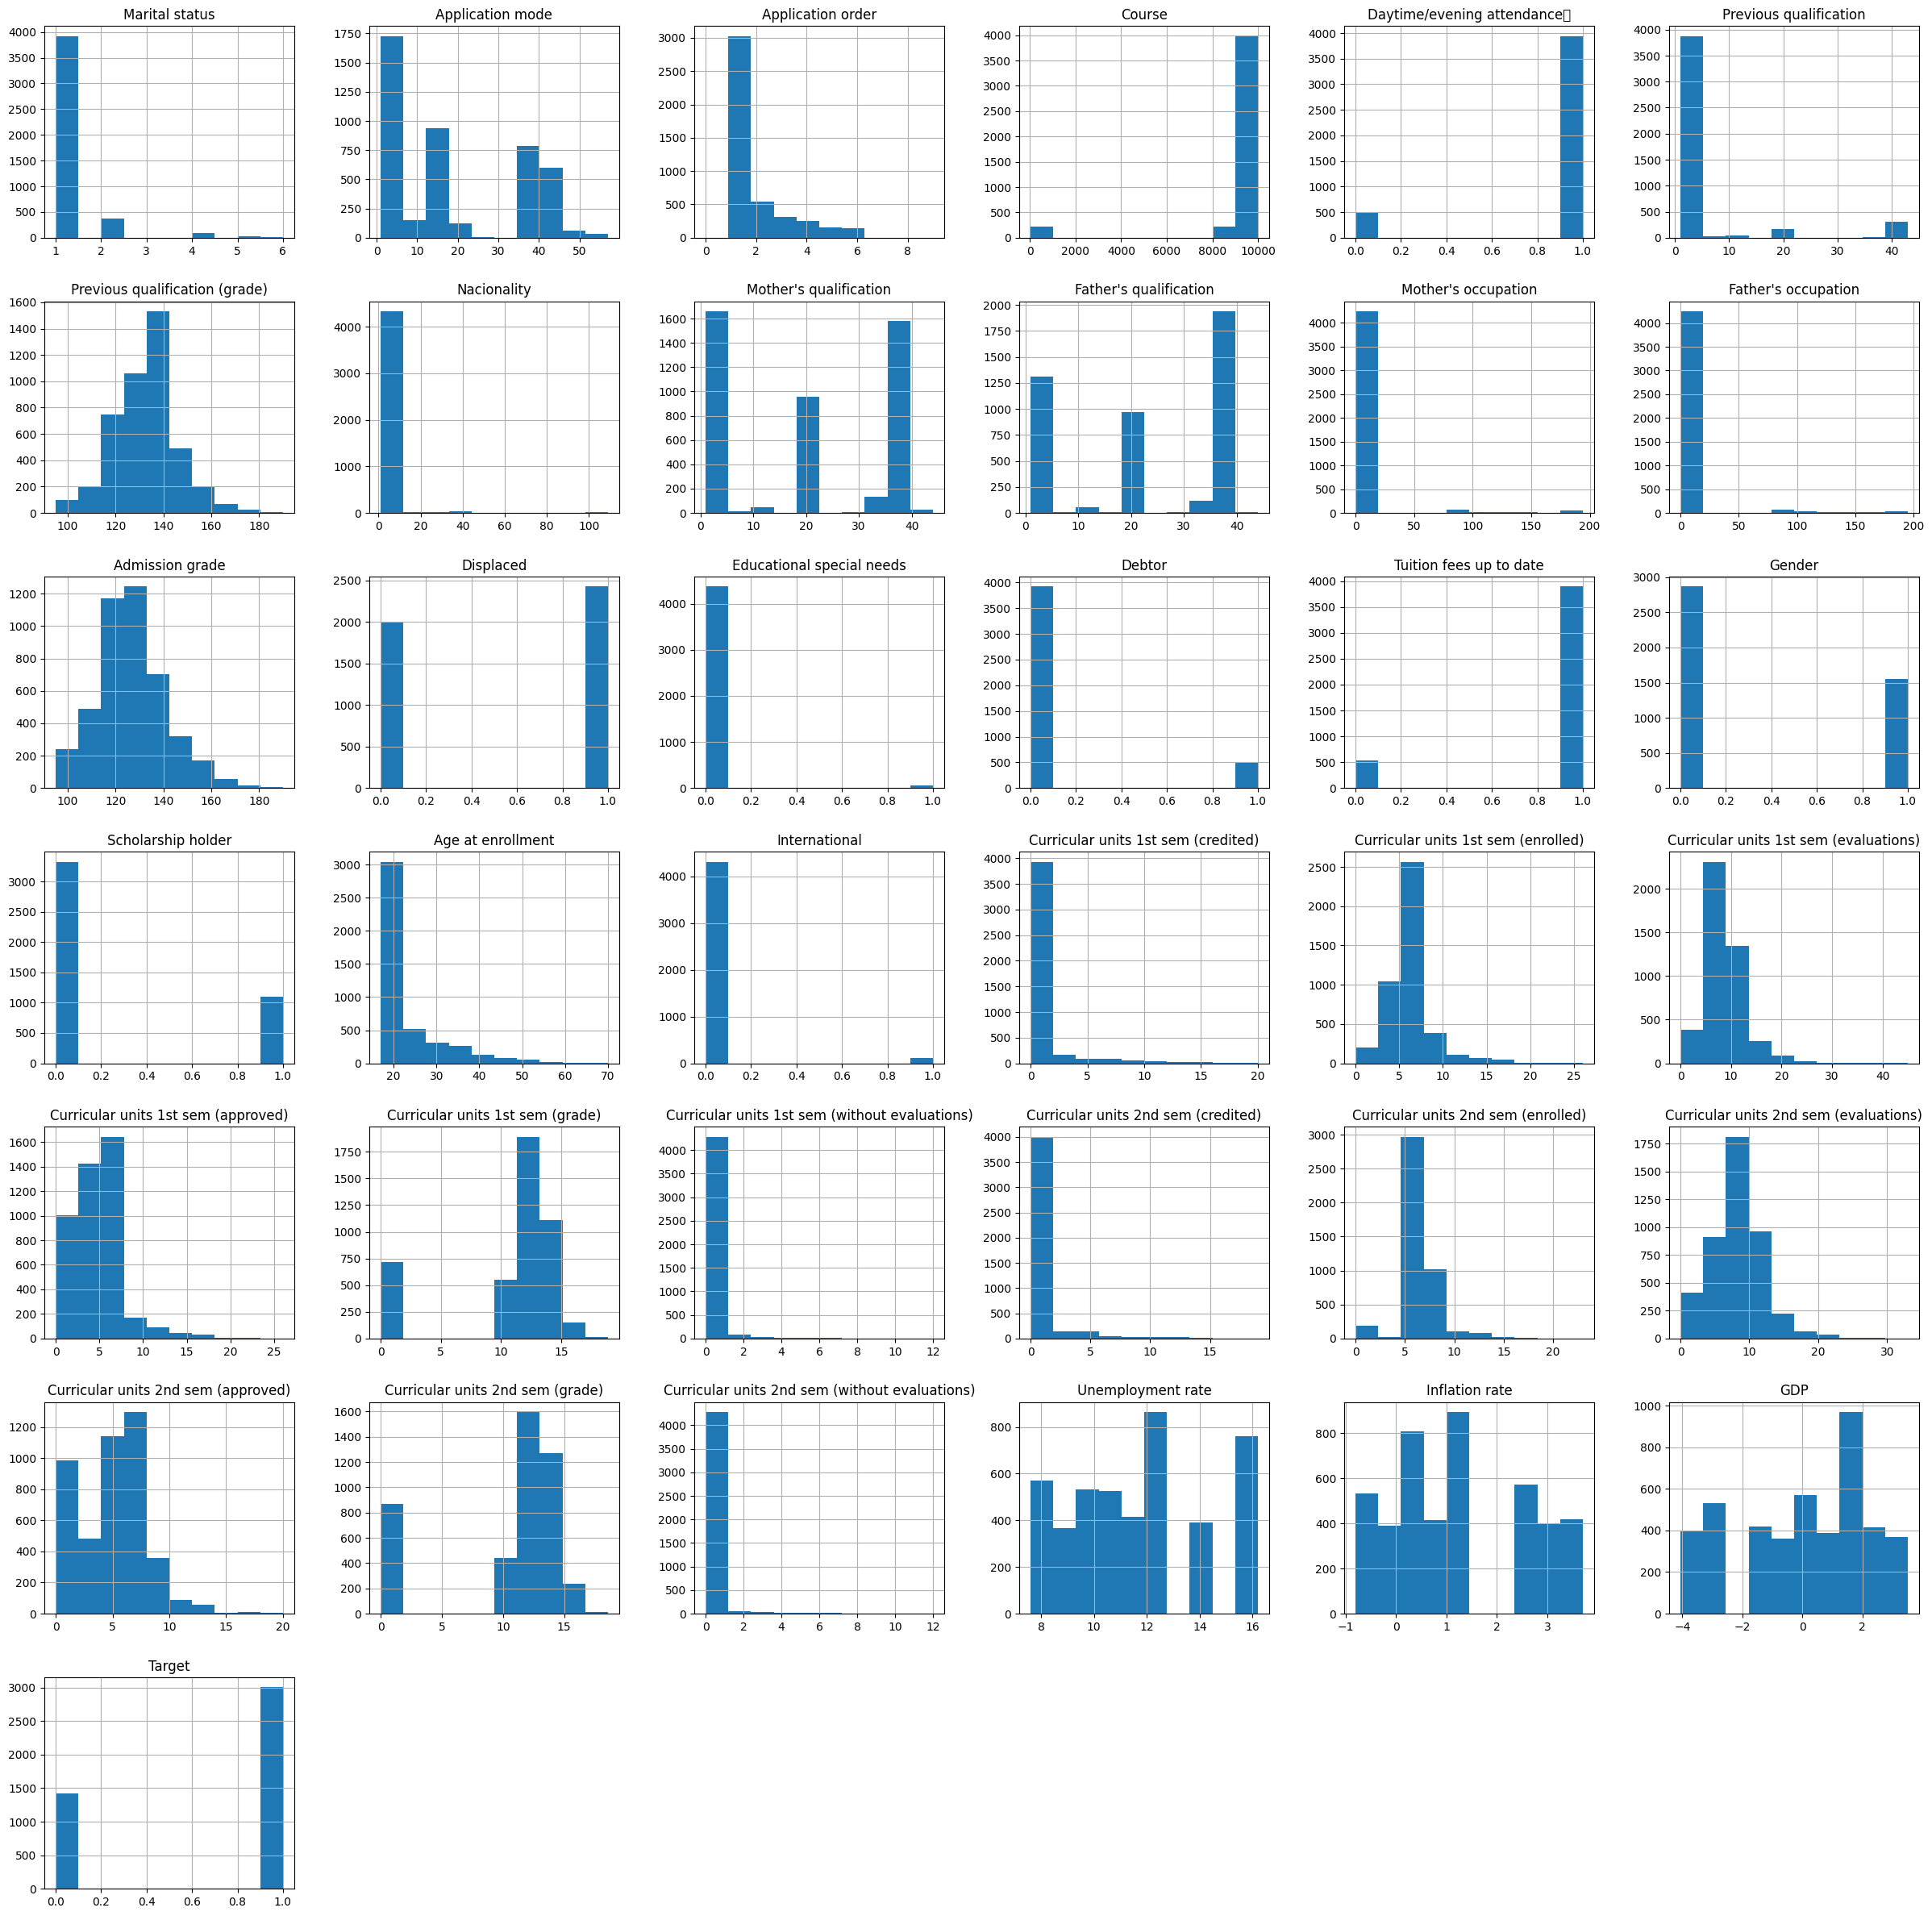

In [14]:
#Plot distributions of key features using histograms, box plots, etc.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Histograms for all columns in a nice way
data.hist(figsize=(30,30))

Marital status                                   -0.093712
Application mode                                 -0.198458
Application order                                 0.070485
Course                                            0.033676
Daytime/evening attendance\t                      0.080499
Previous qualification                           -0.049379
Previous qualification (grade)                    0.078208
Nacionality                                      -0.008346
Mother's qualification                           -0.064958
Father's qualification                           -0.018295
Mother's occupation                               0.021999
Father's occupation                               0.024260
Admission grade                                   0.095806
Displaced                                         0.107232
Educational special needs                        -0.002806
Debtor                                           -0.229407
Tuition fees up to date                           0.4291

<Axes: >

c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


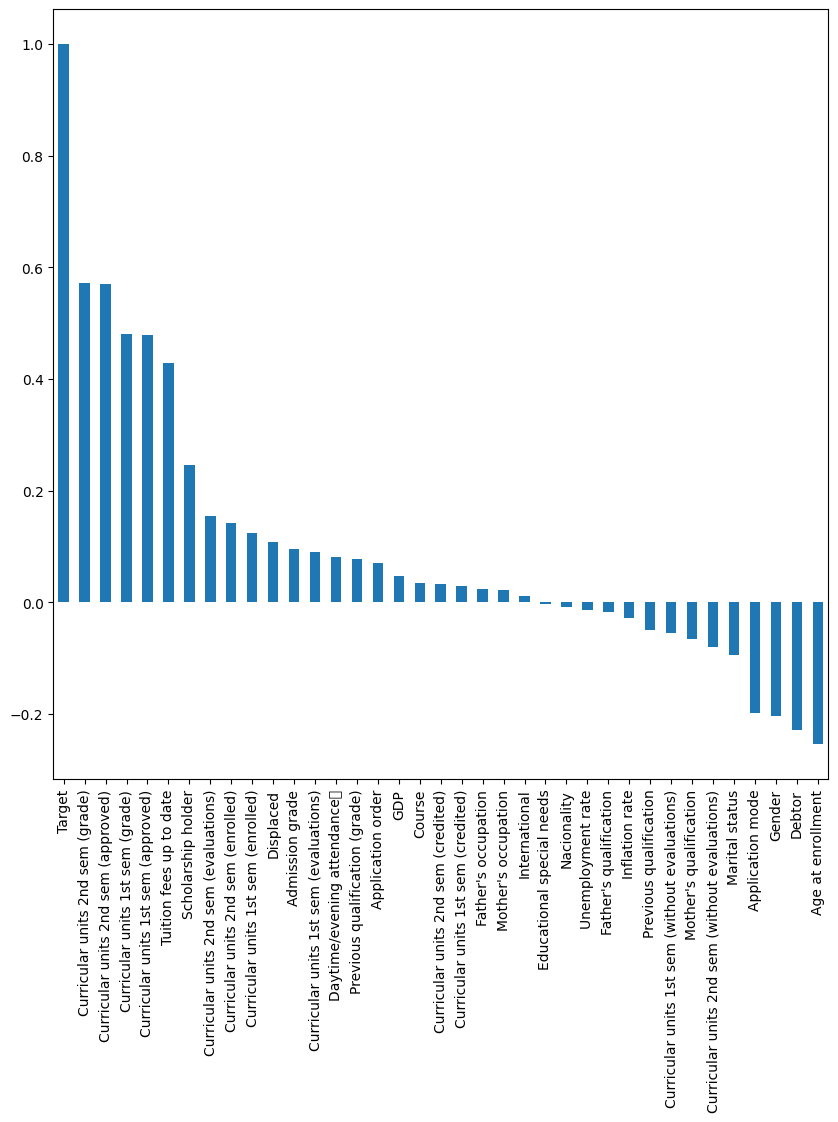

In [ ]:
# correlation between features and Target column
corr = data.corr()
# bar plot of correlation between features and Target column
plt.figure(figsize=(10,10))
# exclude Target column
corr = corr.drop('Target')
corr['Target'].sort_values(ascending=False).plot(kind='bar')

c:\Users\james\anaconda3\envs\dm\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


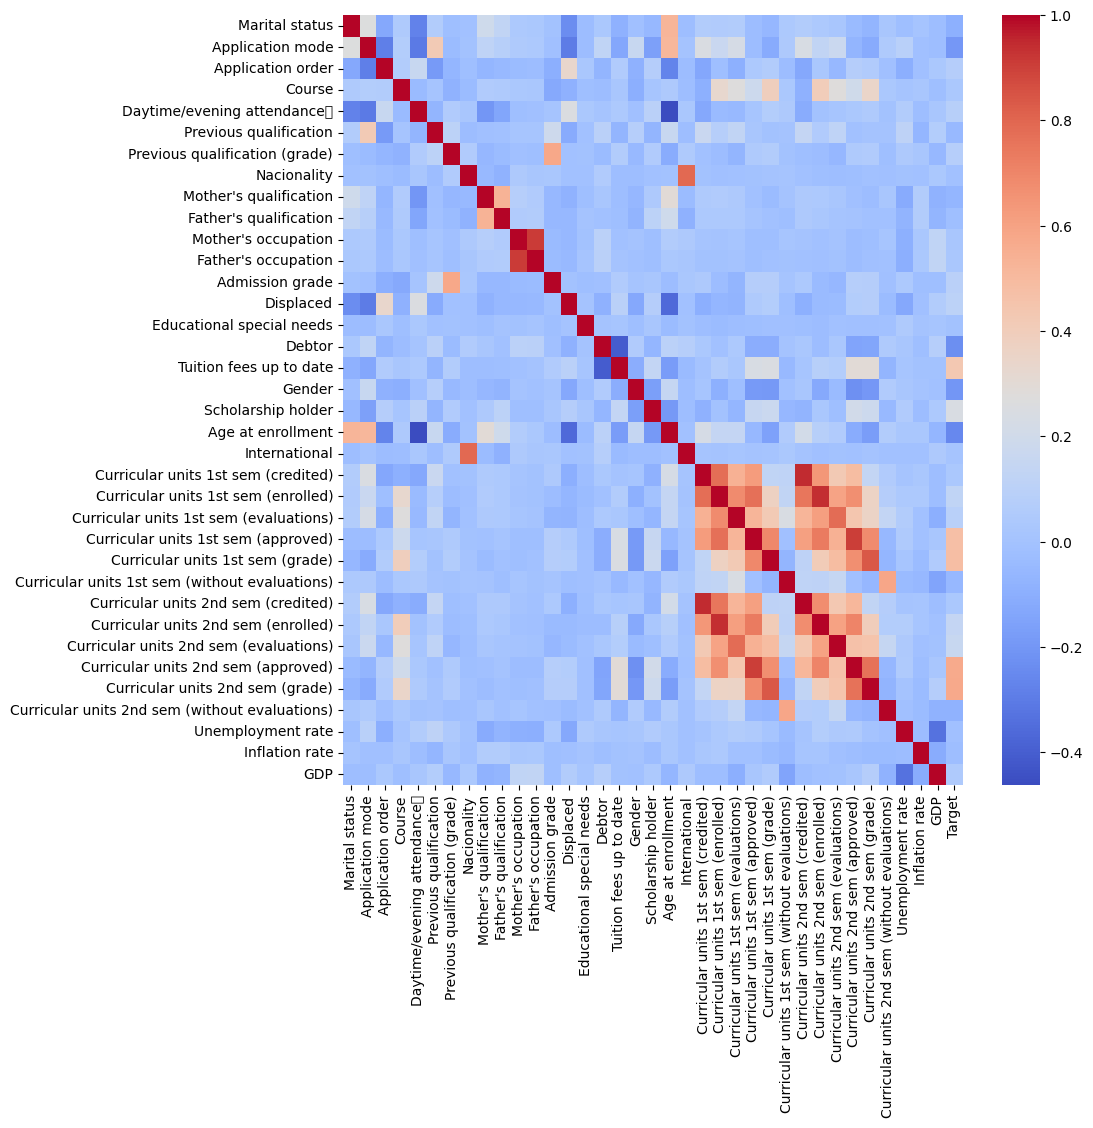

In [23]:
# Visualize relationships between features and identify correlations using heatmaps.
plt.figure(figsize=(10,10))
# positive correlation -> red
# negative correlation -> blue
# no correlation -> white
# do not display numbers in the heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm')
